In [ ]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
traindatagen = ImageDataGenerator(
    shear_range=0.3,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.4,
    zoom_range=0.3,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,)

validatedatagen = ImageDataGenerator(rescale=1./255)

In [ ]:
num_classes = 3 # because we have 5 categories as angry,happy,netural,sad,surprise 
img_rows,img_cols=96,96
batch_size = 32

traindata_generator = traindatagen.flow_from_directory(
    '/content/drive/My Drive/deep_learning/facialexpdata/realfacialexpressiondata/train',
    class_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    target_size=(img_rows,img_cols),
    shuffle=True)

validationdata_generator = validatedatagen.flow_from_directory(
    '/content/drive/My Drive/deep_learning/facialexpdata/realfacialexpressiondata/validation',
    class_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    target_size=(img_rows,img_cols),
    shuffle=True)

Found 17050 images belonging to 3 classes.
Found 2099 images belonging to 3 classes.


In [ ]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [ ]:
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=7, 
                          mode = 'max', 
                          min_delta = 0.01,
                          restore_best_weights=True
                          )

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 17050
nb_validation_samples = 2099
epochs=100

history=model.fit_generator(
                traindata_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data=validationdata_generator,
                validation_steps=nb_validation_samples//batch_size,
                callbacks = [earlystop])

Epoch 1/100
532/532 [==============================] - 45s 85ms/step - loss: 0.6326 - accuracy: 0.7254 - val_loss: 1.1089 - val_accuracy: 0.6279
Epoch 2/100
532/532 [==============================] - 45s 85ms/step - loss: 0.6364 - accuracy: 0.7279 - val_loss: 0.9567 - val_accuracy: 0.6548
Epoch 3/100
532/532 [==============================] - 45s 85ms/step - loss: 0.6231 - accuracy: 0.7282 - val_loss: 0.9741 - val_accuracy: 0.6308
Epoch 4/100
532/532 [==============================] - 45s 85ms/step - loss: 0.6193 - accuracy: 0.7338 - val_loss: 0.9288 - val_accuracy: 0.6514
Epoch 5/100
532/532 [==============================] - 44s 84ms/step - loss: 0.6305 - accuracy: 0.7261 - val_loss: 1.0194 - val_accuracy: 0.6409
Epoch 6/100
532/532 [==============================] - 45s 85ms/step - loss: 0.6251 - accuracy: 0.7256 - val_loss: 0.9158 - val_accuracy: 0.6524
Epoch 7/100
532/532 [==============================] - 46s 86ms/step - loss: 0.6170 - accuracy: 0.7289 - val_loss: 0.8990 - val_ac

In [ ]:
import matplotlib.pyplot as plt

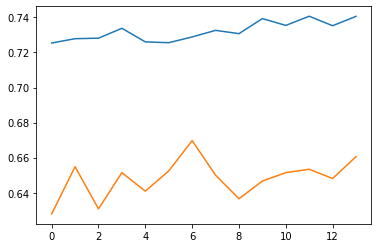

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

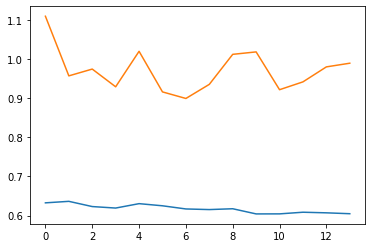

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.save('FER.h5')